In [1]:
using DifferentialEquations, Plots

In [2]:
function powerflow!(du,u,p,t)
    θ_1,v_3,θ_3=u

    p_1=0.944
    p_l3=0
    q_l3=0

    y_11=6.66666667
    y_12=0.0
    y_13=6.66666667
    y_21=y_12
    y_22=5.05050505
    y_23=5.05050505
    y_31=y_13
    y_32=y_23
    y_33=11.71717172

    ϕ_11=-1.57079633
    ϕ_12=0.0
    ϕ_13= 1.57079633
    ϕ_21=ϕ_12
    ϕ_22=-1.57079633
    ϕ_23=1.57079633
    ϕ_31=ϕ_13
    ϕ_32=ϕ_23
    ϕ_33=-1.57079633

    v_1=1.03
    θ_2=0.0
    v_2=1.0
    
    
    du[1] = p_1 - (v_1*v_1*y_11*cos(θ_1 - θ_1 -ϕ_11) + v_1*v_2*y_12*cos(θ_1 - θ_2 -ϕ_12) + v_1*v_3*y_13*cos(θ_1 - θ_3 -ϕ_13))
    # du[2] = i_d*v_1*cos(δ-θ_1) - i_q*v_1*sin(δ-θ_1) - (v_1*v_1*y_11*sin(θ_1 - θ_1 -ϕ_11) + v_1*v_3*y_13*sin(θ_1 - θ_3 -ϕ_13))
    du[2] = p_l3 - (v_3*v_1*y_31*cos(θ_3 - θ_1 -ϕ_31) + v_3*v_2*y_32*cos(θ_3 - θ_2 -ϕ_32) + v_3*v_3*y_33*cos(θ_3 - θ_3 -ϕ_33)) 
    du[3] = q_l3 - (v_3*v_1*y_31*sin(θ_3 - θ_1 -ϕ_31) + v_3*v_2*y_32*sin(θ_3 - θ_2 -ϕ_32) + v_3*v_3*y_33*sin(θ_3 - θ_3 -ϕ_33))
    # du[5] = p_l2 - (v_2*v_2*y_22*cos(θ_2 - θ_2 -ϕ_22) + v_2*v_3*y_23*cos(θ_2 - θ_3 -ϕ_23)) 
    # du[6] = q_l2 - (v_2*v_2*y_22*sin(θ_2 - θ_2 -ϕ_22) + v_2*v_3*y_23*sin(θ_2 - θ_3 -ϕ_23)) 
end

powerflow! (generic function with 1 method)

In [3]:
M0_pf = zeros(3,3)
t_span_pf=(0.0,5)
# θ_2,v_3,θ_3=u
u0_pf=[0,1.0,0];
pf = ODEFunction(powerflow!,mass_matrix=M0_pf)
pf0 = ODEProblem(pf,u0_pf,t_span_pf,());

In [4]:
sol_pf = solve(pf0,Rodas5(),abstol=1e-8,reltol=1e-8);

In [5]:
# sol_pf.u
# θ_1,v_3,θ_3=u
# const θ_10 = sol_pf.u[end][1]
# const v_30 = sol_pf.u[end][2]
# const θ_30 = sol_pf.u[end][3]
# const θ_30
θ_10,v_30,θ_30=sol_pf.u[end]


3-element Vector{Float64}:
 0.32461479155703327
 1.004014153353707
 0.18725718301004352

In [6]:
function fxinit!(du,u,p,t)
    δ,ω,e_q_prime,i_d,i_q=u
    θ_10,v_30,θ_30=p
    
    # e_q_prime=1.1087
    x_d_prime=0.24
    p_m=0.944
    # p_e=p_m
    H=3.5

    y_11=6.66666667
    y_12=0.0
    y_13=6.66666667
    y_21=y_12
    y_22=5.05050505
    y_23=5.05050505
    y_31=y_13
    y_32=y_23
    y_33=11.71717172

    ϕ_11=-1.57079633
    ϕ_12=0.0
    ϕ_13= 1.57079633
    ϕ_21=ϕ_12
    ϕ_22=-1.57079633
    ϕ_23=1.57079633
    ϕ_31=ϕ_13
    ϕ_32=ϕ_23
    ϕ_33=-1.57079633

    v_1=1.03
    θ_1=θ_10
    v_2=1.0
    θ_2=0.0
    v_3=v_30
    θ_3=θ_30
    Ω=2π*60
    d=1
    # q_e=0.28818

    du[1] = Ω*(ω-1)
    # du[2] = (p_m - p_e - d*(ω-1))/2H
    du[2] = -v_1*sin(δ-θ_1) + x_d_prime*i_q
    du[3] = e_q_prime -v_1*cos(δ-θ_1) - x_d_prime*i_d
    # du[4] = i_d*v_1*sin(δ-θ_1) + i_q*v_1*cos(δ-θ_1) - p_e
    du[4] = i_d*v_1*sin(δ-θ_1) + i_q*v_1*cos(δ-θ_1) - (v_1*v_1*y_11*cos(θ_1 - θ_1 -ϕ_11) + v_1*v_2*y_12*cos(θ_1 - θ_2 -ϕ_12) + v_1*v_3*y_13*cos(θ_1 - θ_3 -ϕ_13))
    # du[5] = p_e - (v_1*v_1*y_11*cos(θ_1 - θ_1 -ϕ_11) + v_1*v_3*y_13*cos(θ_1 - θ_3 -ϕ_13))
    # du[5] = i_d*v_1*cos(δ-θ_1) - i_q*v_1*sin(δ-θ_1) - q_e
    du[5] = i_d*v_1*cos(δ-θ_1) - i_q*v_1*sin(δ-θ_1) - (v_1*v_1*y_11*sin(θ_1 - θ_1 -ϕ_11) + v_1*v_2*y_12*sin(θ_1 - θ_2 -ϕ_12)+ v_1*v_3*y_13*sin(θ_1 - θ_3 -ϕ_13))
    # du[8] = q_e - (v_1*v_1*y_11*sin(θ_1 - θ_1 -ϕ_11) + v_1*v_3*y_13*sin(θ_1 - θ_3 -ϕ_13))
    # du[9] = p_l3 - (v_3*v_2*y_32*cos(θ_3 - θ_2 -ϕ_32) + v_3*v_1*y_31*cos(θ_3 - θ_1 -ϕ_31))
    # du[10] = q_l3 - (v_3*v_2*y_32*sin(θ_3 - θ_2 -ϕ_32) + v_3*v_1*y_31*sin(θ_3 - θ_1 -ϕ_31))
end

fxinit! (generic function with 1 method)

In [7]:
M0 = zeros(5,5)
t_span0=(0.0,5)
u0=zeros(5);

In [8]:
f0 = ODEFunction(fxinit!,mass_matrix=M0)
# θ_10,v_30,θ_30=p
p0=[θ_10,v_30,θ_30]
prob0 = ODEProblem(f0,u0,t_span0,p0);

In [9]:
sol0 = solve(prob0);

In [10]:
sol0.u
# δ,ω,e_q_prime,i_d,i_q=u

9-element Vector{Vector{Float64}}:
 [0.5243271427959093, 1.0, 1.1087455985263743, 0.41340918211007344, 0.8514126244761779]
 [0.524327142813149, 1.0, 1.1087455985400045, 0.4134091822250225, 0.8514126245398934]
 [0.524327142813149, 1.0, 1.1087455985400045, 0.4134091822250225, 0.8514126245398934]
 [0.524327142813149, 1.0, 1.1087455985400045, 0.4134091822250225, 0.8514126245398934]
 [0.524327142813149, 1.0, 1.1087455985400045, 0.4134091822250225, 0.8514126245398934]
 [0.524327142813149, 1.0, 1.1087455985400045, 0.4134091822250225, 0.8514126245398934]
 [0.524327142813149, 1.0, 1.1087455985400045, 0.4134091822250225, 0.8514126245398934]
 [0.524327142813149, 1.0, 1.1087455985400045, 0.4134091822250225, 0.8514126245398934]
 [0.524327142813149, 1.0, 1.1087455985400045, 0.4134091822250225, 0.8514126245398934]

In [11]:
δ0,ω0,e_q_prime0,i_d0,i_q0=sol0.u[end]
# δ,ω,e_q_prime,i_d,i_q=u
# const δ0 = sol0.u[end][1]
# const ω0 = sol0.u[end][2]
# const e_q_prime0 = sol0.u[end][3]
# const i_d0 = sol0.u[end][4]
# const i_q0 = sol0.u[end][5]

5-element Vector{Float64}:
 0.524327142813149
 1.0
 1.1087455985400045
 0.4134091822250225
 0.8514126245398934

Now we have initialzed all the state variables
Next, we will simulate the DAEs

In [76]:
function fx!(du,u,p,t)
    δ,ω,i_d,i_q,v_1,θ_1,v_3,θ_3=u
    k,e_q_prime0=p
    
    e_q_prime=e_q_prime0
    x_d_prime=0.24
    p_m=0.944
    H=3.5

    
    y_12=0.0
    y_13=6.66666667
    y_11=y_12+y_13
    y_21=0.0
    y_23=5.05050505
    y_22=y_21+y_23
    y_31=6.66666667
    y_32=5.05050505
    y_33=y_31+y_32

    ϕ_11=-1.57079633
    ϕ_12=0.0
    ϕ_13= 1.57079633
    ϕ_21=0.0
    ϕ_22=-1.57079633
    ϕ_23=1.57079633
    ϕ_31= 1.57079633
    ϕ_32=1.57079633
    ϕ_33=-1.57079633
    
    v_2=1.0
    θ_2=0.0
    
    Ω=2π*60
    d=1

    # x32_pre_fault = 0+0.198im
    # x32_fault = 999999+999999im
    # x32_post_fault = 0+0.396im

    # TODO: Revert modification
    r_f=0
    x_f=1e-4im
    
    y_f = 1/(r_f+x_f)
    g_f=real(y_f)
    b_f=imag(y_f)

    p_fault = (v_3^2)*abs(y_f)*cos(-1*angle(y_f))
    q_fault = (v_3^2)*abs(y_f)*sin(-1*angle(y_f))


    # p_fault_pu = -1*(2)*k
    # q_fault_pu = 0



    p_l3=0 - k*p_fault
    q_l3=0 - k*q_fault
    
    # p_l2=-0.944
    # q_l2=0

    # du[1] = Ω*(ω-1)
    # du[2] = (p_m - (i_d*v_1*sin(δ-θ_1) + i_q*v_1*cos(δ-θ_1)) - d*(ω-1))/(2H)
    # du[3] = -v_1*sin(δ-θ_1) + x_d_prime*i_q
    # du[4] = e_q_prime -v_1*cos(δ-θ_1) - x_d_prime*i_d
    # du[5] = i_d*v_1*sin(δ-θ_1) + i_q*v_1*cos(δ-θ_1) - (v_1*v_1*y_11*cos(θ_1 - θ_1 -ϕ_11) + v_1*v_2*y_12*cos(θ_1 - θ_2 -ϕ_12) + v_1*v_3*y_13*cos(θ_1 - θ_3 -ϕ_13))
    # du[6] = i_d*v_1*cos(δ-θ_1) - i_q*v_1*sin(δ-θ_1) - (v_1*v_1*y_11*sin(θ_1 - θ_1 -ϕ_11) + v_1*v_2*y_12*sin(θ_1 - θ_2 -ϕ_12)+ v_1*v_3*y_13*sin(θ_1 - θ_3 -ϕ_13))
    # du[7] = p_l3 - (v_3*v_1*y_31*cos(θ_3 - θ_1 -ϕ_31) + v_3*v_2*y_32*cos(θ_3 - θ_2 -ϕ_32) + v_3*v_3*y_33*cos(θ_3 - θ_3 -ϕ_33)) + p_fault
    # du[8] = q_l3 - (v_3*v_1*y_31*sin(θ_3 - θ_1 -ϕ_31) + v_3*v_2*y_32*sin(θ_3 - θ_2 -ϕ_32) + v_3*v_3*y_33*sin(θ_3 - θ_3 -ϕ_33)) + q_fault
    
    # Milano's sign notation
    du[1] = Ω*(ω-1)
    du[2] = (p_m - (i_d*v_1*sin(δ-θ_1) + i_q*v_1*cos(δ-θ_1)) - d*(ω-1))/(2H)
    du[3] = v_1*sin(δ-θ_1) - x_d_prime*i_q
    du[4] = -e_q_prime + v_1*cos(δ-θ_1) + x_d_prime*i_d
    du[5] = i_d*v_1*sin(δ-θ_1) + i_q*v_1*cos(δ-θ_1) - (v_1*v_1*y_11*cos(θ_1 - θ_1 -ϕ_11) + v_1*v_2*y_12*cos(θ_1 - θ_2 -ϕ_12) + v_1*v_3*y_13*cos(θ_1 - θ_3 -ϕ_13))
    du[6] = i_d*v_1*cos(δ-θ_1) - i_q*v_1*sin(δ-θ_1) - (v_1*v_1*y_11*sin(θ_1 - θ_1 -ϕ_11) + v_1*v_2*y_12*sin(θ_1 - θ_2 -ϕ_12)+ v_1*v_3*y_13*sin(θ_1 - θ_3 -ϕ_13))
    du[7] = p_l3 - (v_3*v_1*y_31*cos(θ_3 - θ_1 -ϕ_31) + v_3*v_2*y_32*cos(θ_3 - θ_2 -ϕ_32) + v_3*v_3*y_33*cos(θ_3 - θ_3 -ϕ_33))
    du[8] = q_l3 - (v_3*v_1*y_31*sin(θ_3 - θ_1 -ϕ_31) + v_3*v_2*y_32*sin(θ_3 - θ_2 -ϕ_32) + v_3*v_3*y_33*sin(θ_3 - θ_3 -ϕ_33))
end

fx! (generic function with 1 method)

In [77]:
# δ,ω,i_d,i_q,v_1,θ_1,v_3,θ_3=u
M = zeros(8,8)
M[1,1]=1
M[2,2]=1
t_span=(0.0,5)

v_10=1.03
# θ_10=0.3246
v_20=1.0
θ_20=0.0
# v_30=1.004
# θ_30=0.1873
# q_e0=0.28818
# p_e0=0.9

# δ,ω,i_d,i_q,v_1,θ_1,v_3,θ_3=u
u0=[δ0,ω0,i_d0,i_q0,v_10,θ_10,v_30,θ_30];

In [78]:
f = ODEFunction(fx!,mass_matrix=M)
k=0

# x32_arr = [x32_pre_fault,x32_fault,x32_post_fault]

p=[k,e_q_prime0]
prob = ODEProblem(f,u0,t_span,p);

In [56]:
integrator = init(prob,Rodas5())

t: 0.0
u: 8-element Vector{Float64}:
  0.524327142813149
  1.0
  2.841734596650397
  0.0024958586509235122
  0.4267297156980498
  0.5229234291484146
  0.00108052823524191
 -0.5973799552262331

In [57]:
step!(integrator)

In [66]:
step!(integrator)
integrator.sol

┌ Warning: dt(8.881784197001252e-16) <= dtmin(8.881784197001252e-16) at t=4.26083215431397e-5, and step error estimate = 0.04185712078482741. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase C:\Users\aaliq\.julia\packages\SciMLBase\s9wrq\src\integrator_interface.jl:599


retcode: DtLessThanMin
Interpolation: specialized 4rd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 1.0e-6
 4.782574685649064e-6
 4.26083215421397e-5
 4.26083215431397e-5
u: 5-element Vector{Vector{Float64}}:
 [0.524327142813149, 1.0, 2.841734596650397, 0.0024958586509235122, 0.4267297156980498, 0.5229234291484146, 0.00108052823524191, -0.5973799552262331]
 [0.5243271428384944, 1.0000001344618672, 2.841734775158148, 0.0024954882508756676, 0.4267296727938501, 0.522923637493023, 0.0010803678791947973, -0.5973801085862692]
 [0.5243271433928761, 1.0000006430737491, 2.8417347751591273, 0.00249548825113871, 0.42672967279361507, 0.522923638047256, 0.0010803678791213255, -0.5973801083917167]
 [0.5243271888269662, 1.00000572917745, 2.841734775239439, 0.0024954882726608394, 0.42672967277434753, 0.5229236834691783, 0.0010803678730846433, -0.5973800924473054]
 [0.5243271888269662, 1.0000057291774498, 2.8429374324948458, -2.9564421435931334e-9, 0.426440614692118, 0.

In [65]:
get_proposed_dt(integrator)

8.881784197001252e-16

In [61]:
set_proposed_dt!(integrator,1e-15)

1.0e-15

In [62]:
integrator.p[1]=0

0

In [372]:
reinit!(integrator)

retcode: Default
Interpolation: specialized 4rd order "free" stiffness-aware interpolation
t: 1-element Vector{Float64}:
 0.0
u: 1-element Vector{Vector{Float64}}:
 [0.524327142813149, 1.0, 0.4134091822250225, 0.8514126245398934, 1.03, 0.32461479155703327, 1.004014153353707, 0.18725718301004352]

In [373]:
step!(integrator)
integrator.sol

┌ Warning: dt(8.881784197001252e-16) <= dtmin(8.881784197001252e-16) at t=0.0, and step error estimate = 866.3711979768519. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase C:\Users\aaliq\.julia\packages\SciMLBase\s9wrq\src\integrator_interface.jl:599


retcode: DtLessThanMin
Interpolation: specialized 4rd order "free" stiffness-aware interpolation
t: 1-element Vector{Float64}:
 0.0
u: 1-element Vector{Vector{Float64}}:
 [0.524327142813149, 1.0, 0.4134091822250225, 0.8514126245398934, 1.03, 0.32461479155703327, 1.004014153353707, 0.18725718301004352]

In [343]:
integrator.t

0.0007761763195842219

In [344]:
integrator.dt

0.00015316568733282767

In [350]:
get_proposed_dt(integrator)

1.0e-15

In [347]:
set_proposed_dt!(integrator,1e-15)

1.0e-15

In [327]:
integrator.opts.abstol=1e-14
integrator.opts.reltol=1e-14

1.0e-14

In [79]:
const event_time1=[0.10]
const event_time2=[0.20]
v_3_pf=0
θ_e_pf=0

function condition1(u,t,integrator,save_positions=(true,true))
    t in event_time1
end

function condition2(u,t,integrator,save_positions=(true,true))
    t in event_time2
end

function affect1!(integrator)
    @show integrator.u[7] integrator.u[8] integrator.t
    global v_3_pf=integrator.u[7]
    global θ_e_pf=integrator.u[8]
    # integrator.u[7]=0.1
    # integrator.u[8]=0
    integrator.p[1] = 1
    u_modified!(integrator,false)
    set_proposed_dt!(integrator,1e-15)
end

function affect2!(integrator)
    # integrator.u[7]=0.01
    @show integrator.u[7] integrator.u[8] integrator.t
    integrator.p[1] = 0
    # integrator.u[7] = v_3_pf
    # integrator.u[8] = θ_e_pf
    # @show integrator.u[7] integrator.u[8] integrator.t
end

cb1=DiscreteCallback(condition1,affect1!)
cb2=DiscreteCallback(condition2,affect2!)

cbs = CallbackSet(cb1,cb2)

CallbackSet{Tuple{}, Tuple{DiscreteCallback{typeof(condition1), typeof(affect1!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(condition2), typeof(affect2!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}}}((), (DiscreteCallback{typeof(condition1), typeof(affect1!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}(condition1, affect1!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, Bool[1, 1]), DiscreteCallback{typeof(condition2), typeof(affect2!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}(condition2, affect2!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, Bool[1, 1])))

In [80]:
const tstop = [0.10;0.20]
sol2=solve(prob,
            Rodas5P(),
            callback=cbs,
            tstops=tstop,
            # reltol=1e-2,
            # abstol=1e-2,
            # progress=true,
            )

integrator.u[7] = 1.0040141533537066
integrator.u[8] = 0.18725718301004357
integrator.t = 0.1


┌ Warning: dt(8.881784197001252e-16) <= dtmin(8.881784197001252e-16) at t=0.1, and step error estimate = 865.8048921612991. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase C:\Users\aaliq\.julia\packages\SciMLBase\s9wrq\src\integrator_interface.jl:599


retcode: DtLessThanMin
Interpolation: specialized 4rd order "free" stiffness-aware interpolation
t: 8-element Vector{Float64}:
 0.0
 1.0e-6
 1.1e-5
 0.00011099999999999999
 0.0011109999999999998
 0.011110999999999996
 0.1
 0.1
u: 8-element Vector{Vector{Float64}}:
 [0.524327142813149, 1.0, 0.4134091822250225, 0.8514126245398934, 1.03, 0.32461479155703327, 1.004014153353707, 0.18725718301004352]
 [0.524327142813149, 1.0, 0.4134091822250236, 0.8514126245398932, 1.0299999999999998, 0.3246147915570332, 1.0040141533537066, 0.1872571830100435]
 [0.524327142813149, 1.0, 0.41340918222502304, 0.8514126245398934, 1.03, 0.3246147915570332, 1.0040141533537068, 0.1872571830100436]
 [0.524327142813149, 1.0, 0.41340918222502304, 0.8514126245398933, 1.03, 0.3246147915570332, 1.0040141533537068, 0.18725718301004352]
 [0.524327142813149, 1.0, 0.4134091822250236, 0.8514126245398931, 1.0299999999999998, 0.32461479155703327, 1.0040141533537066, 0.18725718301004343]
 [0.524327142813149, 1.0, 0.4134091822250

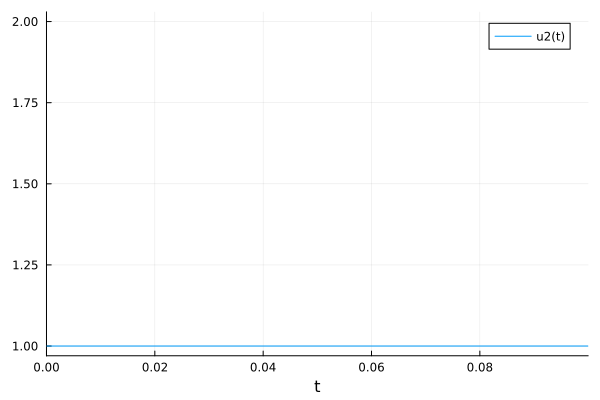

In [188]:
plot(sol2,idxs=(2))

Below code is used for simulation without callbacks

In [380]:
sol=solve(prob,Rodas5(),abstol=1e-5,reltol=1e-5);

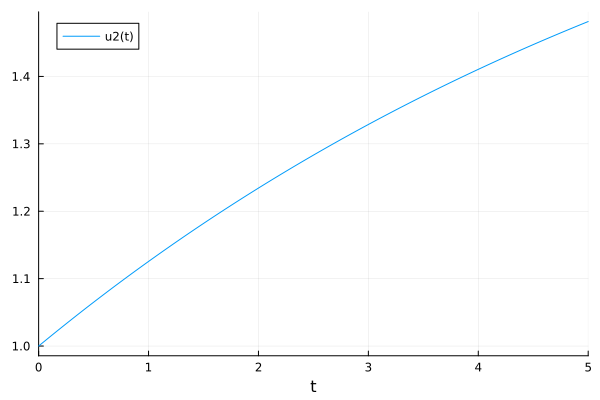

In [383]:
plot(sol,idxs=(2))
# δ,ω,i_d,i_q,v_1,θ_1,v_3,θ_3=u

In [232]:
sol[7,:]

3323-element Vector{Float64}:
 0.0007639386051894482
 0.0007639356746859543
 0.0007639356743995846
 0.0007639356452854584
 0.000763932729155511
 0.000763640362875423
 0.0007440542916742093
 0.0006999199523486993
 0.000642565105168588
 0.0005816819228115129
 ⋮
 0.0005376988346042095
 0.0005653860820877154
 0.0005937193718006887
 0.0006225543675896316
 0.0006516605439702175
 0.0006806793656435142
 0.0007090698483585194
 0.0007359975467035801
 0.0007455012217510093